Shengbo Xu(400320009)

1. By looking at this ckd dataset, a classification problem is to predict if a patient will have CKD in the future based on comparing similarities of the data. It is a binary classification problem because there are 2 options for CKD, either presence or absence. 

2. By looking at the datas, transformations on variables may be needed to get implemented. If we take all the inputs of the numeric numbers and make them to have a mean of 0 and a STDEV of 1 might be able to improved on this model, so it will be easier for us to notice the difference. 

In [9]:
#Q3
import pandas as pd
import numpy as np

ckd_data = pd.read_csv('ckd.csv')
print(ckd_data.shape)
print(ckd_data.dtypes)
print(ckd_data.describe)


(400, 26)
id         int64
age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object
<bound method NDFrame.describe of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      1  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      2   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      3  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      4  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      5  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395

3. This dataset can be used to predict the chronic kidney disease, there're 25 variables. The dataset has 400 rows and it contains catagories and numbers, it also contains missing values. For distributions, let's say for variables such as htn and dm, they show binary distributions where they indicate if they're presence/absense. 

In [10]:
#Q4

num_var = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
for col in num_var:
    ckd_data[col] = pd.to_numeric(ckd_data[col])

mean_diff_class = ckd_data.groupby('class')[num_var].mean()
print(mean_diff_class)

num_features = ckd_data.select_dtypes(include=['float64', 'int64'])
corr_mat = num_features.corr()
print(corr_mat)

#example such as showing htn and dm
htn_counts = ckd_data['htn'].value_counts()
dm_counts = ckd_data['dm'].value_counts()
print(htn_counts)
print(dm_counts)


              age         bp        sg        al       su         bgr  \
class                                                                   
ckd     54.541322  79.625000  1.013918  1.722488  0.76699  175.419811   
notckd  46.516779  71.351351  1.022414  0.000000  0.00000  107.722222   

               bu        sc         sod       pot       hemo        pcv  \
class                                                                     
ckd     72.389030  4.414916  133.901786  4.878443  10.647549  32.939891   
notckd  32.798611  0.868966  141.731034  4.337931  15.188194  46.335616   

               wbcc      rbcc  
class                          
ckd     9069.536424  3.945238  
notckd  7705.594406  5.379021  
            id       age        bp        sg        al        su       bgr  \
id    1.000000 -0.185308 -0.245744  0.642156 -0.541993 -0.283416 -0.338673   
age  -0.185308  1.000000  0.159480 -0.191096  0.122091  0.220866  0.244992   
bp   -0.245744  0.159480  1.000000 -0.218836

4. The mean(average) by class will show differences between the different groups, some might vary between different classes. The counts of some categorical variables such as blood pressure, it may indicate how the condition is distributed in this dataset. By analyzing numerical features, a high +/- numbers can show the relationships between variables. 

In [11]:
#Q5
missing_values = ckd_data.isnull().sum()
filtered = ckd_data.dropna()

for col in num_var:
    ckd_data[col].fillna(ckd_data[col].mean(), inplace=True)


In [12]:
#Q6

#could use z-score and IQR to identify outliers
from scipy import stats
z_scores = np.abs(stats.zscore(ckd_data['bp']))
outlrs = np.where(z_scores > 3)

Q1 = ckd_data['bp'].quantile(0.25)
Q3 = ckd_data['bp'].quantile(0.75)
IQR = Q3 - Q1
lower_bd = Q1 - 1.5 * IQR
upper_bd = Q3 + 1.5 * IQR
outlrs = ckd_data[(ckd_data['bp'] < lower_bd) | (ckd_data['bp'] > upper_bd)]
#cleaned
no_outlrs = ckd_data[~((ckd_data['bp'] < lower_bd) | (ckd_data['bp'] > upper_bd))]


c:\Users\shawn\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shawn\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


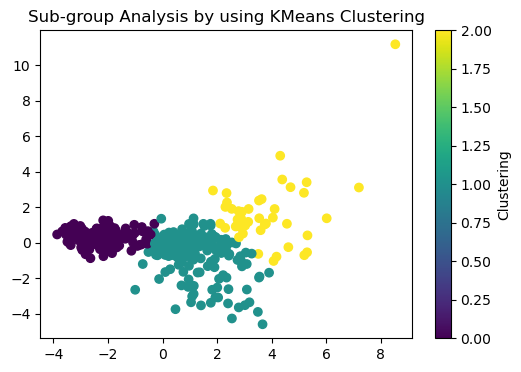

In [13]:
#Q7

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

num_var = ckd_data.select_dtypes(include=['number']).columns
for col in num_var:
    ckd_data[col] = pd.to_numeric(ckd_data[col])

imptr = SimpleImputer(strategy='mean')
ckd_data[num_var] = imptr.fit_transform(ckd_data[num_var])

scaler = StandardScaler()
ckd_data_scaled = scaler.fit_transform(ckd_data[num_var])

pca = PCA(n_components=2)
principal_components = pca.fit_transform(ckd_data_scaled)
kmeans = KMeans(n_clusters=3)
kmeans.fit(principal_components)

#must have no labels
plt.figure(figsize=(6, 4))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Sub-group Analysis by using KMeans Clustering')
plt.colorbar(label='Clustering')
plt.show()


In [14]:
#Q8
from sklearn.model_selection import train_test_split

set1 = ckd_data.drop(columns=['class'])
set2 = ckd_data['class']

train_1, test1, train_2, test2 = train_test_split(set1, set2, test_size=0.3, random_state=1)
print(train_1.shape[0])
print(test1.shape[0])



280
120


9. Logistic regression: it is a straight-forward approach to get the results and it's good algorithm for binary classification problems which is this dataset we're working on.
 
Random forest: it's an ensemble learning model that's effective for classification problems and it can handle categorical and numerical data which is what we have. 

10. Accuracy: it's the most intuitive performance measure and it is useful when the numbers of datas in each class is similar. 

Confusion matrix: it's a table used to describe the performance of a classifier of a dataset with known values, it visualizes the performance of an algorithm for binary classification problems which is our current dataset. 

In [15]:
#Q11 and Q12

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectFromModel

num_col = ckd_data.drop(columns='class').select_dtypes(include=['int64', 'float64']).columns
cat_col = ckd_data.drop(columns='class').select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), num_col),('cat', OneHotEncoder(), cat_col)])

#use the classifier random forest example model from scikit-learn.org to get values before and after to compare
rf_classifier = RandomForestClassifier(random_state=1)
pipeline = Pipeline([('preprocessing', preprocessor),('classifier', rf_classifier)])
pipeline.fit(train_1, train_2)
predictions = pipeline.predict(test1)

accuracy_before = accuracy_score(test2, predictions)
precision_before = precision_score(test2, predictions, average='macro')
recall_before = recall_score(test2, predictions, average='macro')
f1_score_before = f1_score(test2, predictions, average='macro')

print(f"Accuracy: {accuracy_before}")
print(f"Precision: {precision_before}")
print(f"Recall: {recall_before}")
print(f"F1 Score: {f1_score_before}")

feature_selection_pipeline = Pipeline(steps=[('preprocessing', preprocessor),('feature_selection', SelectFromModel(RandomForestClassifier(random_state=1), prefit=False)),
    ('classifier', RandomForestClassifier(random_state=1))])
feature_selection_pipeline.fit(train_1, train_2)
predictions_fs = feature_selection_pipeline.predict(test1)

accuracy_after = accuracy_score(test2, predictions_fs)
precision_after = precision_score(test2, predictions_fs, average='macro')
recall_after = recall_score(test2, predictions_fs, average='macro')
f1_score_after = f1_score(test2, predictions_fs, average='macro')

print(f"\nAccuracy: {accuracy_after}")
print(f"Precision: {precision_after}")
print(f"Recall: {recall_after}")
print(f"F1 Score: {f1_score_after}")


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


12. By comparing the accuracy of logistic regression and random forest, it shows that they have the same results. In theory, one of them should have a more direct result than the other one. 


In [16]:
#Q13

import matplotlib.pyplot as plt
import seaborn as sns

pullout_feature = rf_classifier.feature_importances_
cat_feature = preprocessor.named_transformers_['cat'].get_feature_names_out(cat_col)
total_feature = np.concatenate([num_col, cat_feature])
importances_series = pd.Series(data=pullout_feature, index=total_feature)
sorted_values = importances_series.sort_values(ascending=False)

print(sorted_values.index[1], sorted_values.iloc[1])
print(sorted_values.index[2], sorted_values.iloc[2])


pcv 0.1496562719838606
sg 0.13352793004017266


13. After re-training, it'll show the importance of each predictor variables. It also help us to understand the impact of specific variables. For example, if a patient is older than the mean and the person has higher blood pressure, maybe this person will have a higher likelihood to get chronic kidney disease. 

In this case, I pulled out the first two most important values which are pcv-packed cell volumn and sg-specific gravity. Both of them are a indicators of factors of chronic kidney disease. 

15. Shengbo Xu

reference: 
https://www.kdnuggets.com/2022/09/visualizing-confusion-matrix-scikitlearn.html#:~:text=Components%20of%20Confusion%20Matrix,%2C%20False%20Negative%20(FN).

https://scikit-learn.org/stable/getting_started.html.

https://github.com

https://www.datacamp.com/tutorial/random-forests-classifier-python

